# Data Analysis
The dataset used in this exercise is a panel of respondents surveyed between 1972 and 2012 in the United States. It contains data on a respondent’s position on an issue, their political preferences and voting behavior, as well as basic demographics and income, etc. Our main variables of interest will be deviation from partisanship, or in other words, voting against your identified party in a given election, disagreement with your identified party on abortion, and disagreement with party on gun regulation.

In [306]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [307]:
#importing dataset and replacing NaN field with zeros
df = pd.read_excel('sec3_data.xlsx')
df.columns = df.columns.str.rstrip()

In [308]:
df.dropna(inplace=True)
df['Deviation from Partisanship'].unique()

array(['Vote for own party', 'Vote for opposing party'], dtype=object)

In [309]:
df['region of interview']=np.where(df['region of interview'] =='1', 'e. nor. central', df['region of interview'])

In [310]:
df['region of interview'].unique()

array(['e. nor. central', 'middle atlantic', 'w. nor. central',
       'south atlantic', 'e. sou. central', 'w. sou. central', 'mountain',
       'pacific'], dtype=object)

In [311]:
df['Deviation from Partisanship'] = df['Deviation from Partisanship'].astype('str') 
le = preprocessing.LabelEncoder()
df['Deviation from Partisanship'] = le.fit_transform(df['Deviation from Partisanship'])
df['Deviation from Partisanship'].unique()
df['Deviation from Partisanship'].dtypes

dtype('int32')

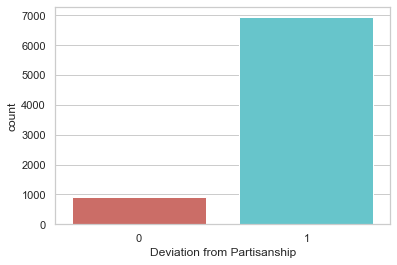

In [312]:
sns.countplot(x='Deviation from Partisanship', data = df, palette = 'hls')
plt.show()

In [313]:
value_count=df['Deviation from Partisanship'].value_counts()
count_opposing_party=value_count[0]
#count_0=value_count[0] # if it is str
count_own_party=value_count[1]
#count_1=value_count['1'] # if it is str


#count_own_party = len(df['Deviation from Partisanship']== 1)
#count_opposing_party = len(df['Deviation from Partisanship'] == 0)

print(count_own_party)
print(count_opposing_party)

per_own_party = count_own_party/(count_own_party + count_opposing_party)
print("Percentage of opposing party: ", per_opposing_party*100)

per_opposing_party = count_opposing_party/(count_own_party + count_opposing_party)
print("Percentage of own party: ", per_own_party*100)


6942
912
Percentage of opposing party:  11.611917494270434
Percentage of own party:  88.38808250572956


In [314]:
df['Democrat'] = df['Democrat'].astype('str') 
le = preprocessing.LabelEncoder()
df['Democrat'] = le.fit_transform(df['Democrat'])

df['Disagreement with Party on Social Issues'] = df['Disagreement with Party on Social Issues'].astype('str') 
le = preprocessing.LabelEncoder()
df['Disagreement with Party on Social Issues'] = le.fit_transform(df['Disagreement with Party on Social Issues'])

df['age of respondent'] = df['age of respondent'].astype('str') 
le = preprocessing.LabelEncoder()
df['age of respondent'] = le.fit_transform(df['age of respondent'])

df['female'] = df['female'].astype('str') 
le = preprocessing.LabelEncoder()
df['female'] = le.fit_transform(df['female'])

df['family income in constant $'] = df['family income in constant $'].astype('str') 
le = preprocessing.LabelEncoder()
df['family income in constant $'] = le.fit_transform(df['family income in constant $'])

df['black'] = df['black'].astype('str') 
le = preprocessing.LabelEncoder()
df['black'] = le.fit_transform(df['black'])

df['marital status'] = df['marital status'].astype('str') 
le = preprocessing.LabelEncoder()
df['marital status'] = le.fit_transform(df['marital status'])

df['region of interview'] = df['region of interview'].astype('str') 
le = preprocessing.LabelEncoder()
df['region of interview'] = le.fit_transform(df['region of interview'])

df['gss year for this respondent'] = df['gss year for this respondent'].astype('str') 
le = preprocessing.LabelEncoder()
df['gss year for this respondent'] = le.fit_transform(df['gss year for this respondent'])


## 1 - Run an OLS regression to estimate the impact of disagreement on abortion with your identified party on deviation from partisanship, controlling for whether a respondent was a Democrat or Republican, how strongly they identified with their party, as well as year. Interpret your results. (Word limit=150 words)

In [315]:
X = df[['Deviation from Partisanship','Democrat', 'gss year for this respondent']] 
y = df['Disagreement with Party on Social Issues']
import statsmodels.api as sm
model = sm.OLS(y.astype(float), X.astype(float))
result=model.fit()
print(result.summary())

                                            OLS Regression Results                                           
Dep. Variable:     Disagreement with Party on Social Issues   R-squared (uncentered):                   0.352
Model:                                                  OLS   Adj. R-squared (uncentered):              0.352
Method:                                       Least Squares   F-statistic:                              1420.
Date:                                      Sun, 10 Nov 2019   Prob (F-statistic):                        0.00
Time:                                              18:48:13   Log-Likelihood:                         -6116.9
No. Observations:                                      7854   AIC:                                  1.224e+04
Df Residuals:                                          7851   BIC:                                  1.226e+04
Df Model:                                                 3                                                  
Covariance

OLS regression exercise demonstrates following results:
1.	Disagreement with Party on Social Issues is directly related to Deviation from Partisanship. 
This indicates that people who do not agree with their party on social issues have more chances of deviating from in line with their party policies.
2.	Disagreement with Party on Social Issues is indirectly related to
This indicates that people who do register with Democrat have lesser chances to deviate from party line even if they are in disagreement with the party on social issues.
3.	Disagreement with Party on Social Issues is directly related to Deviation from Partisanship. 
This indicates that people who do not agree with their party on social issues have very little impact of their gss year when deviating from in line with their party policies.


# 2 - Rerun the specification in a), additionally controlling for some demographic variables (age, female, real income, black, marital status, and region). What can you say about the impact of the abortion variable now? Do other respondent characteristics matter in predicting deviation from partisanship? (Word limit=200 words)

In [316]:
X1 = df[['Deviation from Partisanship','Democrat', 'gss year for this respondent', 'age of respondent', 
         'female', 'family income in constant $', 'black', 'marital status', 'region of interview']] 
y1 = df['Disagreement with Party on Social Issues']
import statsmodels.api as sm
model1 = sm.OLS(y1.astype(float), X1.astype(float))
result1=model1.fit()
print(result1.summary())

                                            OLS Regression Results                                           
Dep. Variable:     Disagreement with Party on Social Issues   R-squared (uncentered):                   0.412
Model:                                                  OLS   Adj. R-squared (uncentered):              0.411
Method:                                       Least Squares   F-statistic:                              610.4
Date:                                      Sun, 10 Nov 2019   Prob (F-statistic):                        0.00
Time:                                              18:48:14   Log-Likelihood:                         -5734.9
No. Observations:                                      7854   AIC:                                  1.149e+04
Df Residuals:                                          7845   BIC:                                  1.155e+04
Df Model:                                                 9                                                  
Covariance

OLS regression exercise here demonstrates:
1.	Directly related to Deviation from Partisanship, indicates people not agreeing with their party on social issues have more chances of deviating from their party policies.
2.	Indirectly related to being democrat, indicates people who do register with Democrat have lesser chances to deviate even if they are in disagreement with the party.
3.	Indirectly related to gss year of this respondent. Indicates, people who do agree with their party have very little chances to deviate even if they are in disagreement with the party.
4.	Directly related to age of respondent. Indicates, people with increasing age have more chances of disagreement with party.
5.	Directly related to weather the respondent is female or not. Indicates, females have higher rate of disagreement with their party.
6.	Directly related to family income of respondent. Indicates, people who have higher family income have very small chances in disagreement with party.
7.	Directly related to weather the respondent is black or not. Indicates, people who are black have more disagreement with their party.
8.	Directly related to marital status of respondent. Indicates, married people have more chances of Disagreement with party.
9.	Directly related to region of interview of respondent. Indicates, people who were interviewed in a region have similar chances of Disagreement with party.


# 3 - Now repeat b) above but with this time with regional fixed effects as well. How do the results differ from b)? Explain why you think the results are different, and if this is a better/worse specification than b). (Word limit=250 words)

# 4 - Does abortion matter more for females than for males in terms of predicting deviation from partisanship? Or more for non-blacks versus blacks? Run two separate regressions to test for this, building on the specification used in c). Comment on your findings. (Word limit=150 words)

In [317]:
#For Male & Female
X3 = df[['Deviation from Partisanship','Democrat', 'gss year for this respondent', 'age of respondent', 
         'female', 'family income in constant $', 'marital status', 'region of interview']] 
y3 = df['Disagreement with Party on Social Issues']
import statsmodels.api as sm
model3 = sm.OLS(y3.astype(float), X3.astype(float))
result3=model3.fit()
print(result3.summary())

                                            OLS Regression Results                                           
Dep. Variable:     Disagreement with Party on Social Issues   R-squared (uncentered):                   0.405
Model:                                                  OLS   Adj. R-squared (uncentered):              0.404
Method:                                       Least Squares   F-statistic:                              666.4
Date:                                      Sun, 10 Nov 2019   Prob (F-statistic):                        0.00
Time:                                              18:48:14   Log-Likelihood:                         -5783.3
No. Observations:                                      7854   AIC:                                  1.158e+04
Df Residuals:                                          7846   BIC:                                  1.164e+04
Df Model:                                                 8                                                  
Covariance

In [318]:
#For black/non-black
X3 = df[['Deviation from Partisanship','Democrat', 'gss year for this respondent', 'age of respondent', 
         'black', 'family income in constant $', 'marital status', 'region of interview']] 
y3 = df['Disagreement with Party on Social Issues']
import statsmodels.api as sm
model4 = sm.OLS(y3.astype(float), X3.astype(float))
result4=model4.fit()
print(result4.summary())

                                            OLS Regression Results                                           
Dep. Variable:     Disagreement with Party on Social Issues   R-squared (uncentered):                   0.411
Model:                                                  OLS   Adj. R-squared (uncentered):              0.411
Method:                                       Least Squares   F-statistic:                              684.8
Date:                                      Sun, 10 Nov 2019   Prob (F-statistic):                        0.00
Time:                                              18:48:14   Log-Likelihood:                         -5739.7
No. Observations:                                      7854   AIC:                                  1.150e+04
Df Residuals:                                          7846   BIC:                                  1.155e+04
Df Model:                                                 8                                                  
Covariance

Our OLS regression exercise demonstrates Disagreement with Party on social issues:
1.	Is directly related to weather the respondent is female or not. Indicating that females have higher rate of disagreement with their party on social issues.
2.	Is directly related to weather the respondent is black or not. Indicating that black people have higher rate of disagreement with their party on social issues.


# 5 - Export your regression output from a) to d) in a table to be included in a publication. Make sure to label and format it appropriately.

In [319]:
from statsmodels.iolib.summary2 import summary_col
print(summary_col([result, result1, result2, result3, result4],stars=True,float_format='%0.2f',
                 info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)}))


                             Disagreement with Party on Social Issues I Disagreement with Party on Social Issues II Disagreement with Party on Social Issues III Disagreement with Party on Social Issues IIII Disagreement with Party on Social Issues IIIII
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Democrat                     -0.04***                                   -0.03**                                     -0.03**                                      -0.07***                                      -0.03**                                       
                             (0.01)                                     (0.01)                                      (0.01)                                       (0.01)                                        (0.01)                        

# 6 - Think about two other factors that may affect a person’s voting behavior and their proclivity to vote against their identified party. Run another regression controlling for the additional variables you consider relevant. Interpret your results and explain your choice of variables. (Word limit=250 words)

In [320]:
df['highest year of school completed'] = df['highest year of school completed'].astype('str') 
le = preprocessing.LabelEncoder()
df['highest year of school completed'] = le.fit_transform(df['highest year of school completed'])

df['political party affiliation'] = df['political party affiliation'].astype('str') 
le = preprocessing.LabelEncoder()
df['political party affiliation'] = le.fit_transform(df['political party affiliation'])

X5 = df[['Deviation from Partisanship','Democrat', 'gss year for this respondent', 'age of respondent', 
         'female', 'family income in constant $', 'marital status', 'region of interview', 
         'highest year of school completed', 'political party affiliation', 'black']] 
y5 = df['Disagreement with Party on Social Issues']
import statsmodels.api as sm
model5 = sm.OLS(y5, X5)
result5=model5.fit()
print(result5.summary())

                                            OLS Regression Results                                           
Dep. Variable:     Disagreement with Party on Social Issues   R-squared (uncentered):                   0.415
Model:                                                  OLS   Adj. R-squared (uncentered):              0.414
Method:                                       Least Squares   F-statistic:                              505.1
Date:                                      Sun, 10 Nov 2019   Prob (F-statistic):                        0.00
Time:                                              18:48:15   Log-Likelihood:                         -5716.0
No. Observations:                                      7854   AIC:                                  1.145e+04
Df Residuals:                                          7843   BIC:                                  1.153e+04
Df Model:                                                11                                                  
Covariance

Our OLS regression exercise demonstrates Disagreement with Party on social issues:

1.Directly related to Deviation from Partisanship. Indicates, people who do not agree with their party on social issues have more chances of deviating from their party policies.

2.Indirectly related to democrat. Indicates, people who do register with Democrat have lesser chances to deviate from party even if they are in disagreement with the party.

3.Indirectly related to gss year of this respondent. Indicates, people who do agree with their party have very little chances to deviate from party line even if they are in disagreement with the party.

4.Directly related to age of respondent. Indicates, people with increasing age have more chances of Disagreement with party.

5.Directly related to weather the respondent is female or not. Indicates, females have higher rate of disagreement with their party.

6.Directly related to family income of respondent. Indicates, people who have higher family income have very small chances in disagreement with party.

7.Directly related weather the respondent is black or not. Indicates, people who are black have more disagreement with their party.

8.Directly related to marital status of respondent. Indicates, married people have more chances of Disagreement with party.

9.Directly related to region of interview of respondent. Indicates, people who were interviewed in a region have more chances of Disagreement with party.

10.Directly related to highest year of school completed. Indicates, people with higher education have better chances of Disagreement with party.

11.Indirectly related to political party affiliation. Indicates, people who have political party affiliation has lesser chances of Disagreement with party.

Highest year of school completed and Political party affiliation reflects on political and social awareness. Such people behavior is rational rather than emotional.


# 7 - Rerun the specification used in c), but this time also include disagreement on gun laws, as well as whether the respondent has ever been threatened with a gun. What can you say about the impact of abortion now? Which of the two issue positions has a greater impact on partisan deviation? Comment on if you think this specification is better than c) in determining which issues affect deviation from partisanship, and why. (Word limit=250 words)

In [321]:
df['ever threatened with gun or shot at'] = df['ever threatened with gun or shot at'].astype('str') 
le = preprocessing.LabelEncoder()
df['ever threatened with gun or shot at'] = le.fit_transform(df['ever threatened with gun or shot at'])

df['Disagreement with Party on Gun Permits'] = df['Disagreement with Party on Gun Permits'].astype('str') 
le = preprocessing.LabelEncoder()
df['Disagreement with Party on Gun Permits'] = le.fit_transform(df['Disagreement with Party on Gun Permits'])

X6 = df[['Deviation from Partisanship','Democrat', 'gss year for this respondent', 'age of respondent', 
         'female', 'black', 'family income in constant $', 'marital status', 'region of interview', 
         'Disagreement with Party on Gun Permits', 'ever threatened with gun or shot at']] 
y6 = df['Disagreement with Party on Social Issues']
import statsmodels.api as sm
model6 = sm.OLS(y6.astype(float), X6.astype(float))
result6=model6.fit()
print(result6.summary())

                                            OLS Regression Results                                           
Dep. Variable:     Disagreement with Party on Social Issues   R-squared (uncentered):                   0.418
Model:                                                  OLS   Adj. R-squared (uncentered):              0.417
Method:                                       Least Squares   F-statistic:                              511.2
Date:                                      Sun, 10 Nov 2019   Prob (F-statistic):                        0.00
Time:                                              18:48:15   Log-Likelihood:                         -5696.7
No. Observations:                                      7854   AIC:                                  1.142e+04
Df Residuals:                                          7843   BIC:                                  1.149e+04
Df Model:                                                11                                                  
Covariance

Our OLS regression exercise demonstrates Disagreement with Party on social issues:
1.	Directly related to Deviation from Partisanship. Indicates, people who do not agree with their party on social issues have more chances of deviating from their party policies.
2.	Indirectly related to democrat. Indicates, people who do register with Democrat have lesser chances to deviate from party line even if they are in disagreement with the party.
3.	Indirectly related to gss year of this respondent. Indicates, people who do agree with their party have very little chances to deviate from party line even if they are in disagreement with the party.
4.	Directly related to age of respondent. Indicates, people with increasing age have more chances of disagreement with party.
5.	Directly related to weather the respondent is female or not. Indicates, females have higher rate of disagreement with their party.
6.	Directly related to family income of respondent. Indicates, people who have higher family income have very small chances in disagreement with party.
7.	Directly related weather the respondent is black or not. Indicates, black people have higher rate of disagreement with their party.
8.	Directly related to marital status of respondent. Indicates, married people have more chances of disagreement with party.
9.	Directly related to region of interview of respondent. Indicates, people who were interviewed in a region have similar chances of Disagreement with Party on Social Issues.	
10.	Directly related to disagreement with party on gun permits. Indicates, people who have disagreement with party on gun permits have higher chances of disagreement with the party.
11.	Directly related to ever threatened with gun or shot at. Indicates, people who were threatened with gun have higher chances of disagreement with the party.

As seen from the results, Disagreement with party on gun permits has higher impact on Disagreement with party. 
